In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

In [91]:
import numpy as np

class SingleLayerPerceptronSigmoid:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3, 0.3, size=input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def _add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return self._sigmoid(summation)

    def train(self, X_train, y_train):
        X_train_biased = self._add_bias(X_train)

        for epoch in range(self.epochs):
            for inputs, label in zip(X_train_biased, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                adjustment = -2 * error * self._sigmoid_derivative(prediction)

                self.weights -= self.learning_rate * adjustment * inputs

            # Print training accuracy at each epoch (optional)
            if epoch % 10 == 0:
                training_accuracy = self.evaluate(X_train, y_train)
                print(f"Epoch {epoch}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

    def predict(self, X_test):
        X_test_biased = self._add_bias(X_test)
        predictions = np.round(self._predict(X_test_biased)).astype(np.int32)
        return predictions

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def get_weights(self):
        return self.weights


In [95]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class Perceptron(object):
    def __init__(self, X_dim, activation='sigmoid'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_derivative
        else:
            raise ValueError('Unknown activation function %s' % activation)
            
        nweights = X_dim + 1
        self.W = (2 * np.random.random(nweights) - 1) * 0.25
        self.W = self.W.reshape(-1, 1)
        self.train_errors = []
        self.testing_errors = []
    
    def _add_bias_X(self, X):
        """Returns X with an additional entry set to 1, representing bias"""
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, :-1] = X
        return temp
    
    def _error_derivative(self, y_true, y_pred, y_pred_prime):
        return -2 * (y_true - y_pred) * y_pred_prime  # -2 dapet dari mana
    
    def _error(self, y_true, y_pred):
        return (y_true - y_pred)**2
        
    def train(self, X_train, y_train, X_validation, y_validation,
              learning_rate=0.01, epochs=10, minibatch_size=10, weight_decay=0):
        assert len(X_train.shape) == 2, "X must be 2D"
        X_train = self._add_bias_X(X_train)
        X_validation = self._add_bias_X(X_validation)
        
        self.weight_decay = weight_decay
        
        for epoch in range(epochs):
            minibatch_indices = np.arange(X_train.shape[0])
            np.random.shuffle(minibatch_indices)
            # for each minibatch, compute gradient of weights
            for start in range(0, len(minibatch_indices), minibatch_size):
                end = start + minibatch_size
                indices = minibatch_indices[start:end]
                Xb = X_train[indices]
                yb = y_train[indices]
                
                l = Xb.dot(self.W).flatten()
                deltas = self._error_derivative(yb, self.activation(l), self.activation_deriv(l))
                grad_W = Xb.T.dot(deltas).reshape(-1, 1) / minibatch_size
                self.W -= learning_rate * grad_W + self.weight_decay * self.W
            
            # evaluate train/validation errors
            self.train_errors.append(
                self._error(y_train, self.decision_function(X_train, addbias=False)).mean()
            )
            self.testing_errors.append(
                self._error(y_validation, self.decision_function(X_validation, addbias=False)).mean()
            )
        
        return self
                    
    def predict(self, X, addbias=True):
        return (self.decision_function(X, addbias) > 0.5).astype(np.int64)

    def decision_function(self, X, addbias=True):
        """
        - if addbias is True, an entry with 1 will be added to X to represent the bias.
        """
        "sigmoid 0 sampai 1, 0.8219"
        if addbias:
            X = self._add_bias_X(X)
        return self.activation(X.dot(self.W).flatten())

In [85]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']);ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])
    plt.show()

In [86]:
lr = 0.01
epochs = 1000

In [87]:
train_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Training.xlsx', sheet_name='Normalisasi', index_col=0)
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values

test_normalize = pd.read_excel('D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/Data Testing.xlsx', sheet_name='Normalisasi', index_col=0)
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values

In [92]:
input_size = x_train_normalize.shape[1]
p = SingleLayerPerceptronSigmoid(input_size, learning_rate=lr, epochs=epochs)
p.train(x_train_normalize, y_train_normalize)
predict = p.predict(x_test_normalize)

Epoch 0/1000: Training Accuracy = 59.55%
Epoch 10/1000: Training Accuracy = 77.95%
Epoch 20/1000: Training Accuracy = 77.95%
Epoch 30/1000: Training Accuracy = 78.23%
Epoch 40/1000: Training Accuracy = 77.95%
Epoch 50/1000: Training Accuracy = 77.67%
Epoch 60/1000: Training Accuracy = 78.37%
Epoch 70/1000: Training Accuracy = 78.93%
Epoch 80/1000: Training Accuracy = 79.07%
Epoch 90/1000: Training Accuracy = 79.07%
Epoch 100/1000: Training Accuracy = 79.07%
Epoch 110/1000: Training Accuracy = 79.21%
Epoch 120/1000: Training Accuracy = 79.21%
Epoch 130/1000: Training Accuracy = 79.07%
Epoch 140/1000: Training Accuracy = 79.07%
Epoch 150/1000: Training Accuracy = 78.93%
Epoch 160/1000: Training Accuracy = 79.21%
Epoch 170/1000: Training Accuracy = 79.49%
Epoch 180/1000: Training Accuracy = 79.49%
Epoch 190/1000: Training Accuracy = 79.92%
Epoch 200/1000: Training Accuracy = 79.92%
Epoch 210/1000: Training Accuracy = 79.78%
Epoch 220/1000: Training Accuracy = 79.78%
Epoch 230/1000: Traini

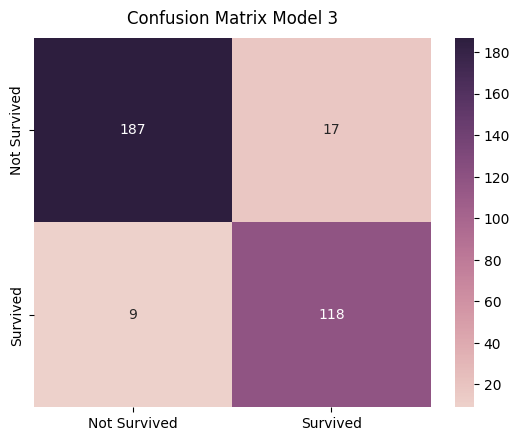

In [93]:
model3_cf = confusion_matrix(y_test_normalize, predict)
plot_cm(model3_cf, 'Model 3')

In [94]:
model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.954082,0.916667,0.935000,204.00000
Survived,0.874074,0.929134,0.900763,127.00000
accuracy,0.921450,0.921450,0.921450,0.92145
macro avg,0.914078,0.922900,0.917882,331.00000
weighted avg,0.923384,0.921450,0.921864,331.00000


In [100]:
perceptron = Perceptron(x_train_normalize.shape[1]).train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize,
                                          epochs=1000, minibatch_size=10)
predict = perceptron.predict(x_test_normalize)
model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.970443,0.965686,0.968059,204.000000
Survived,0.945312,0.952756,0.949020,127.000000
accuracy,0.960725,0.960725,0.960725,0.960725
macro avg,0.957878,0.959221,0.958539,331.000000
weighted avg,0.960801,0.960725,0.960754,331.000000
